#### 분류결과표

In [1]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [2]:
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

#### 이진분류 시스템의 예

In [3]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [4]:
confusion_matrix(y_true, y_pred, labels=[1, 0])

array([[3, 1],
       [0, 2]], dtype=int64)

#### 평가점수

In [5]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [6]:
y_true = [0, 0, 1, 1, 2, 2, 2]
y_pred = [0, 0, 1, 2, 2, 2, 1]
target_names=['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       0.50      0.50      0.50         2
     class 2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.72      0.72      0.72         7
weighted avg       0.71      0.71      0.71         7



#### ROC 커브

In [7]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0, random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=['f', 'y_hat', 'y'])
df.sort_values('f', ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.363163,1.0,1.0
1,2.065047,1.0,1.0
2,1.633657,1.0,1.0
3,1.626171,1.0,1.0
4,1.624967,1.0,1.0
5,1.219678,1.0,1.0
6,0.378296,1.0,0.0
7,0.094285,1.0,1.0
8,-0.438666,0.0,0.0
9,-0.765888,0.0,0.0


In [8]:
confusion_matrix(y, y_hat, labels=[1, 0])

array([[7, 1],
       [1, 7]], dtype=int64)

In [9]:
recall = 7 / (7 + 1)
fallout = 1 / (1 + 7)
print('recall = ', recall)
print('fallout = ', fallout)

recall =  0.875
fallout =  0.125


In [10]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.36316277,  2.36316277,  1.21967832,  0.37829565,  0.09428499,
        -0.76588836, -0.92693183, -4.11896895]))

In [12]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([1.9139748 , 0.9139748 , 0.77200693, 0.59346197, 0.5235538 ,
        0.31736921, 0.28354759, 0.01600107]))

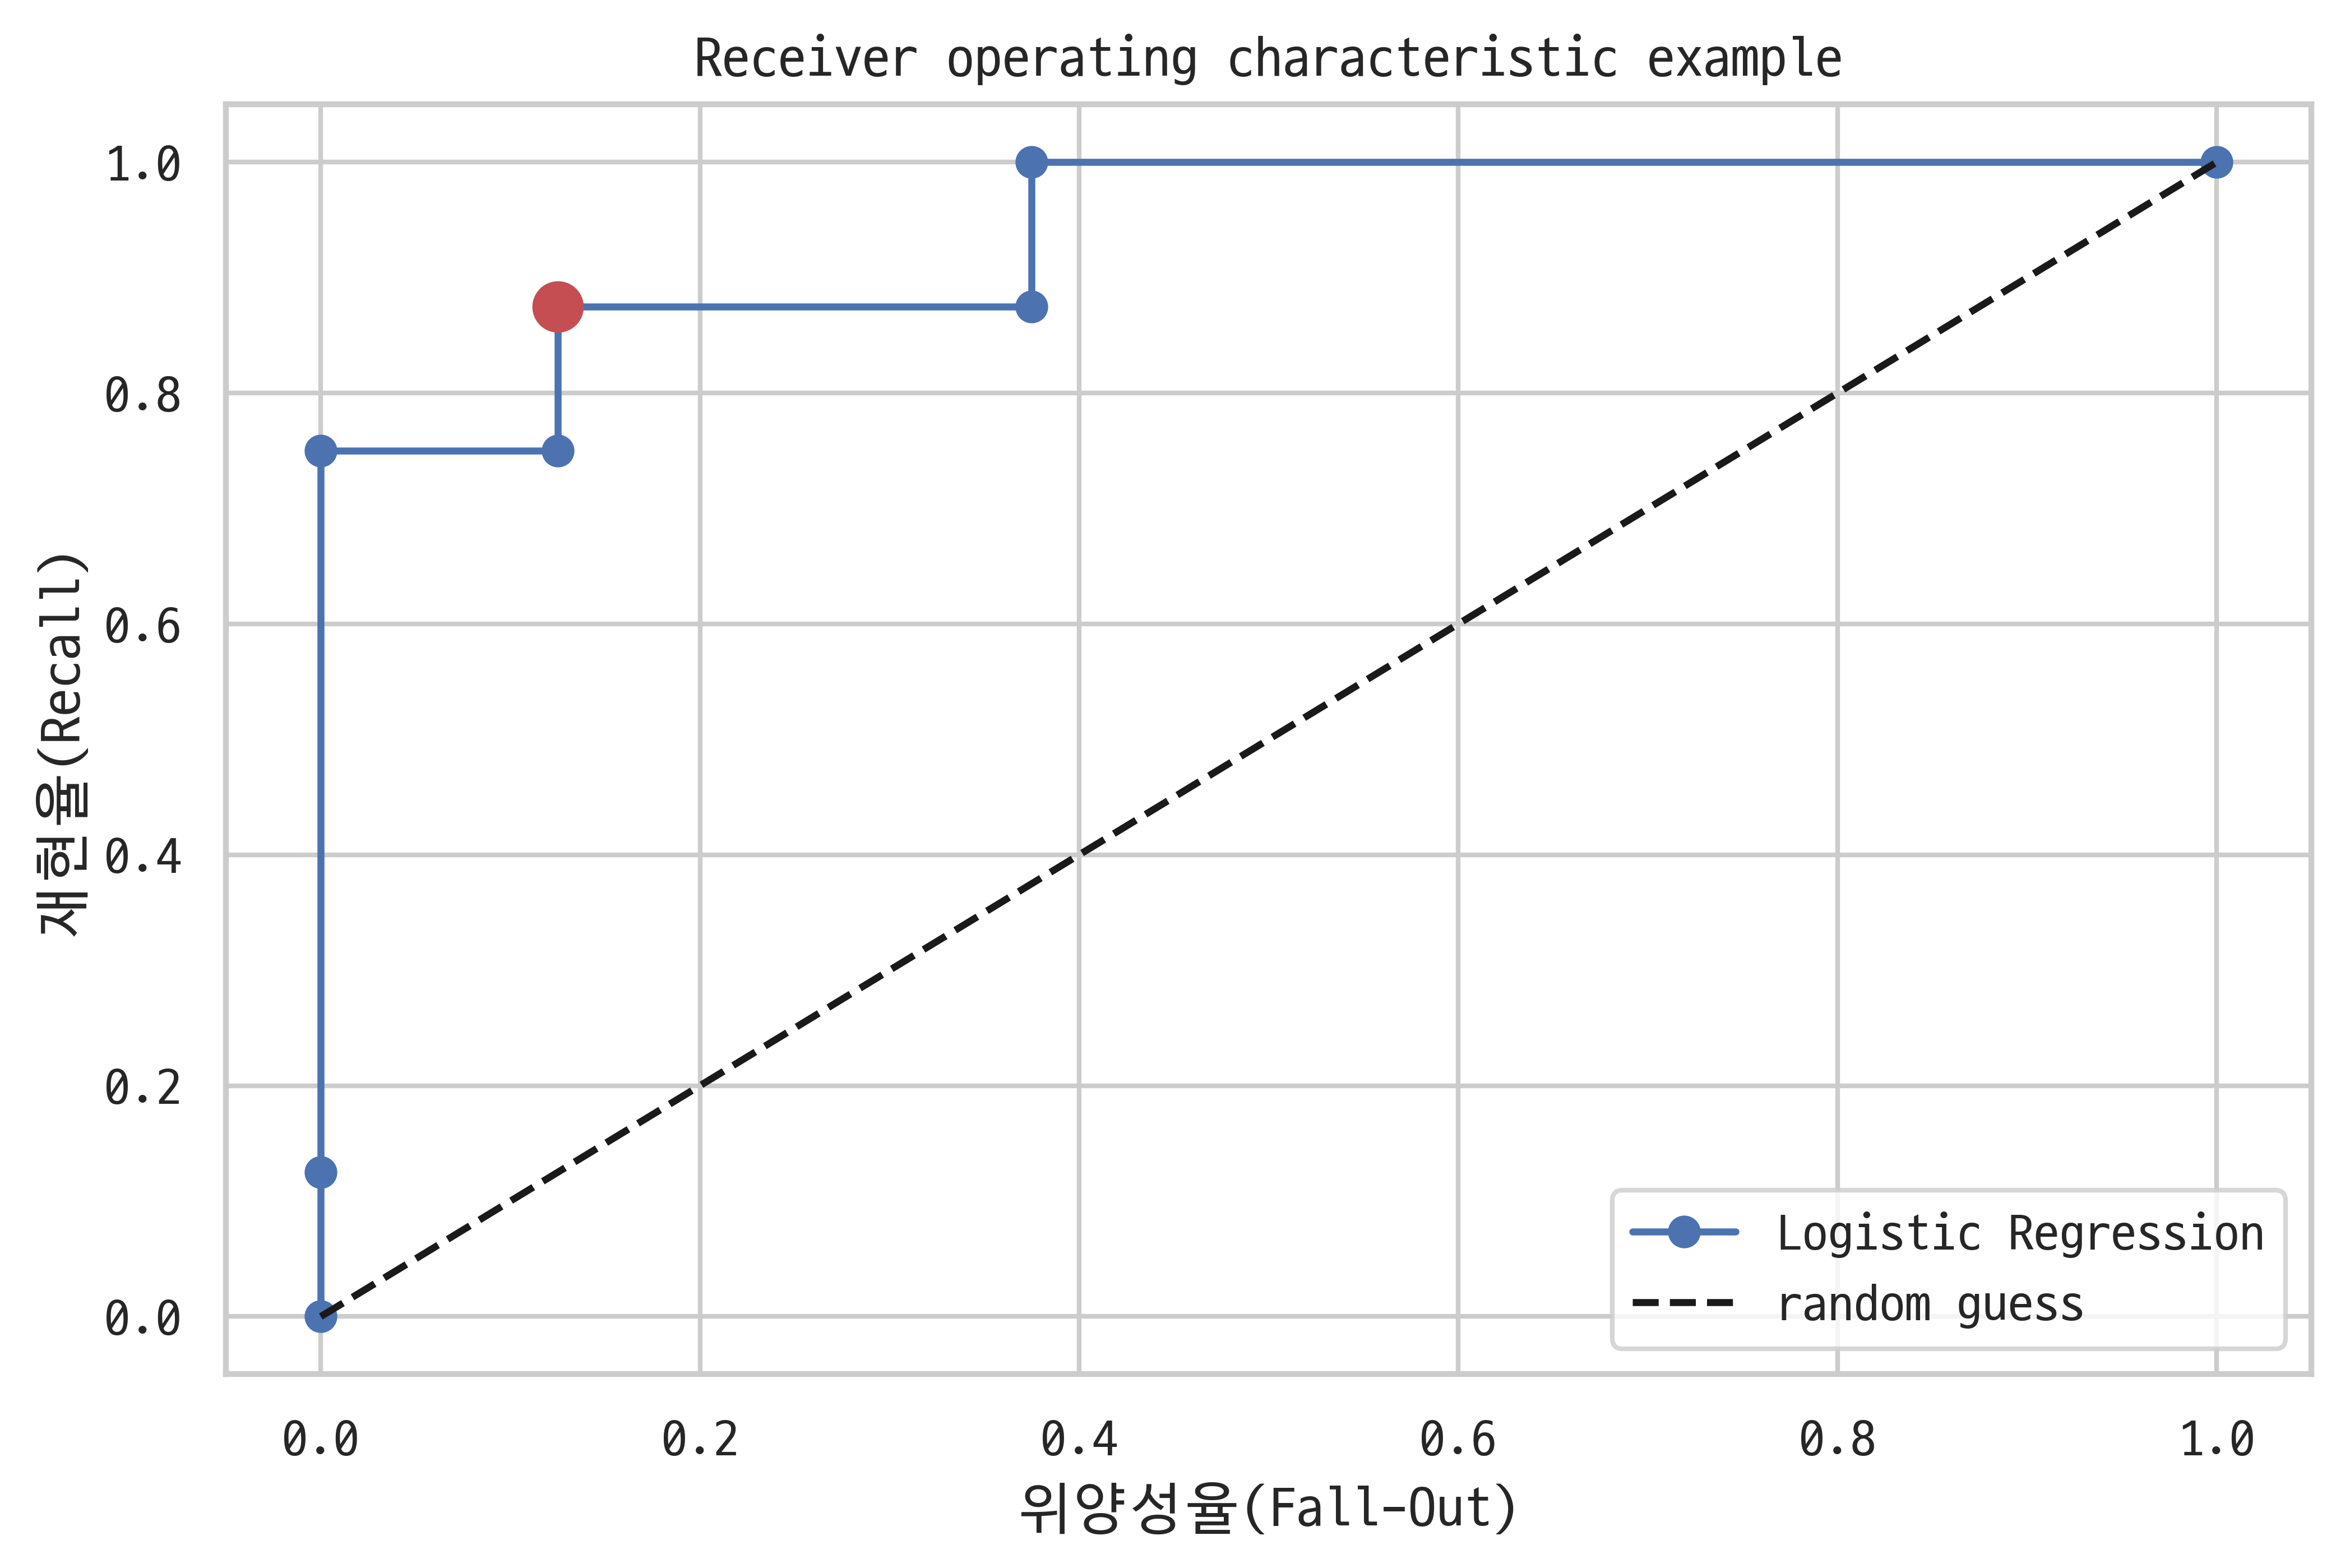

In [15]:
plt.plot(fpr, tpr, 'o-', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성율(Fall-Out)')
plt.ylabel('재현율(Recall)')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

In [17]:
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [18]:
print(confusion_matrix(y, y_hat1))

[[940   3]
 [ 30  27]]


In [19]:
print(confusion_matrix(y, y_hat2))

[[940   3]
 [ 30  27]]


In [20]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [21]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



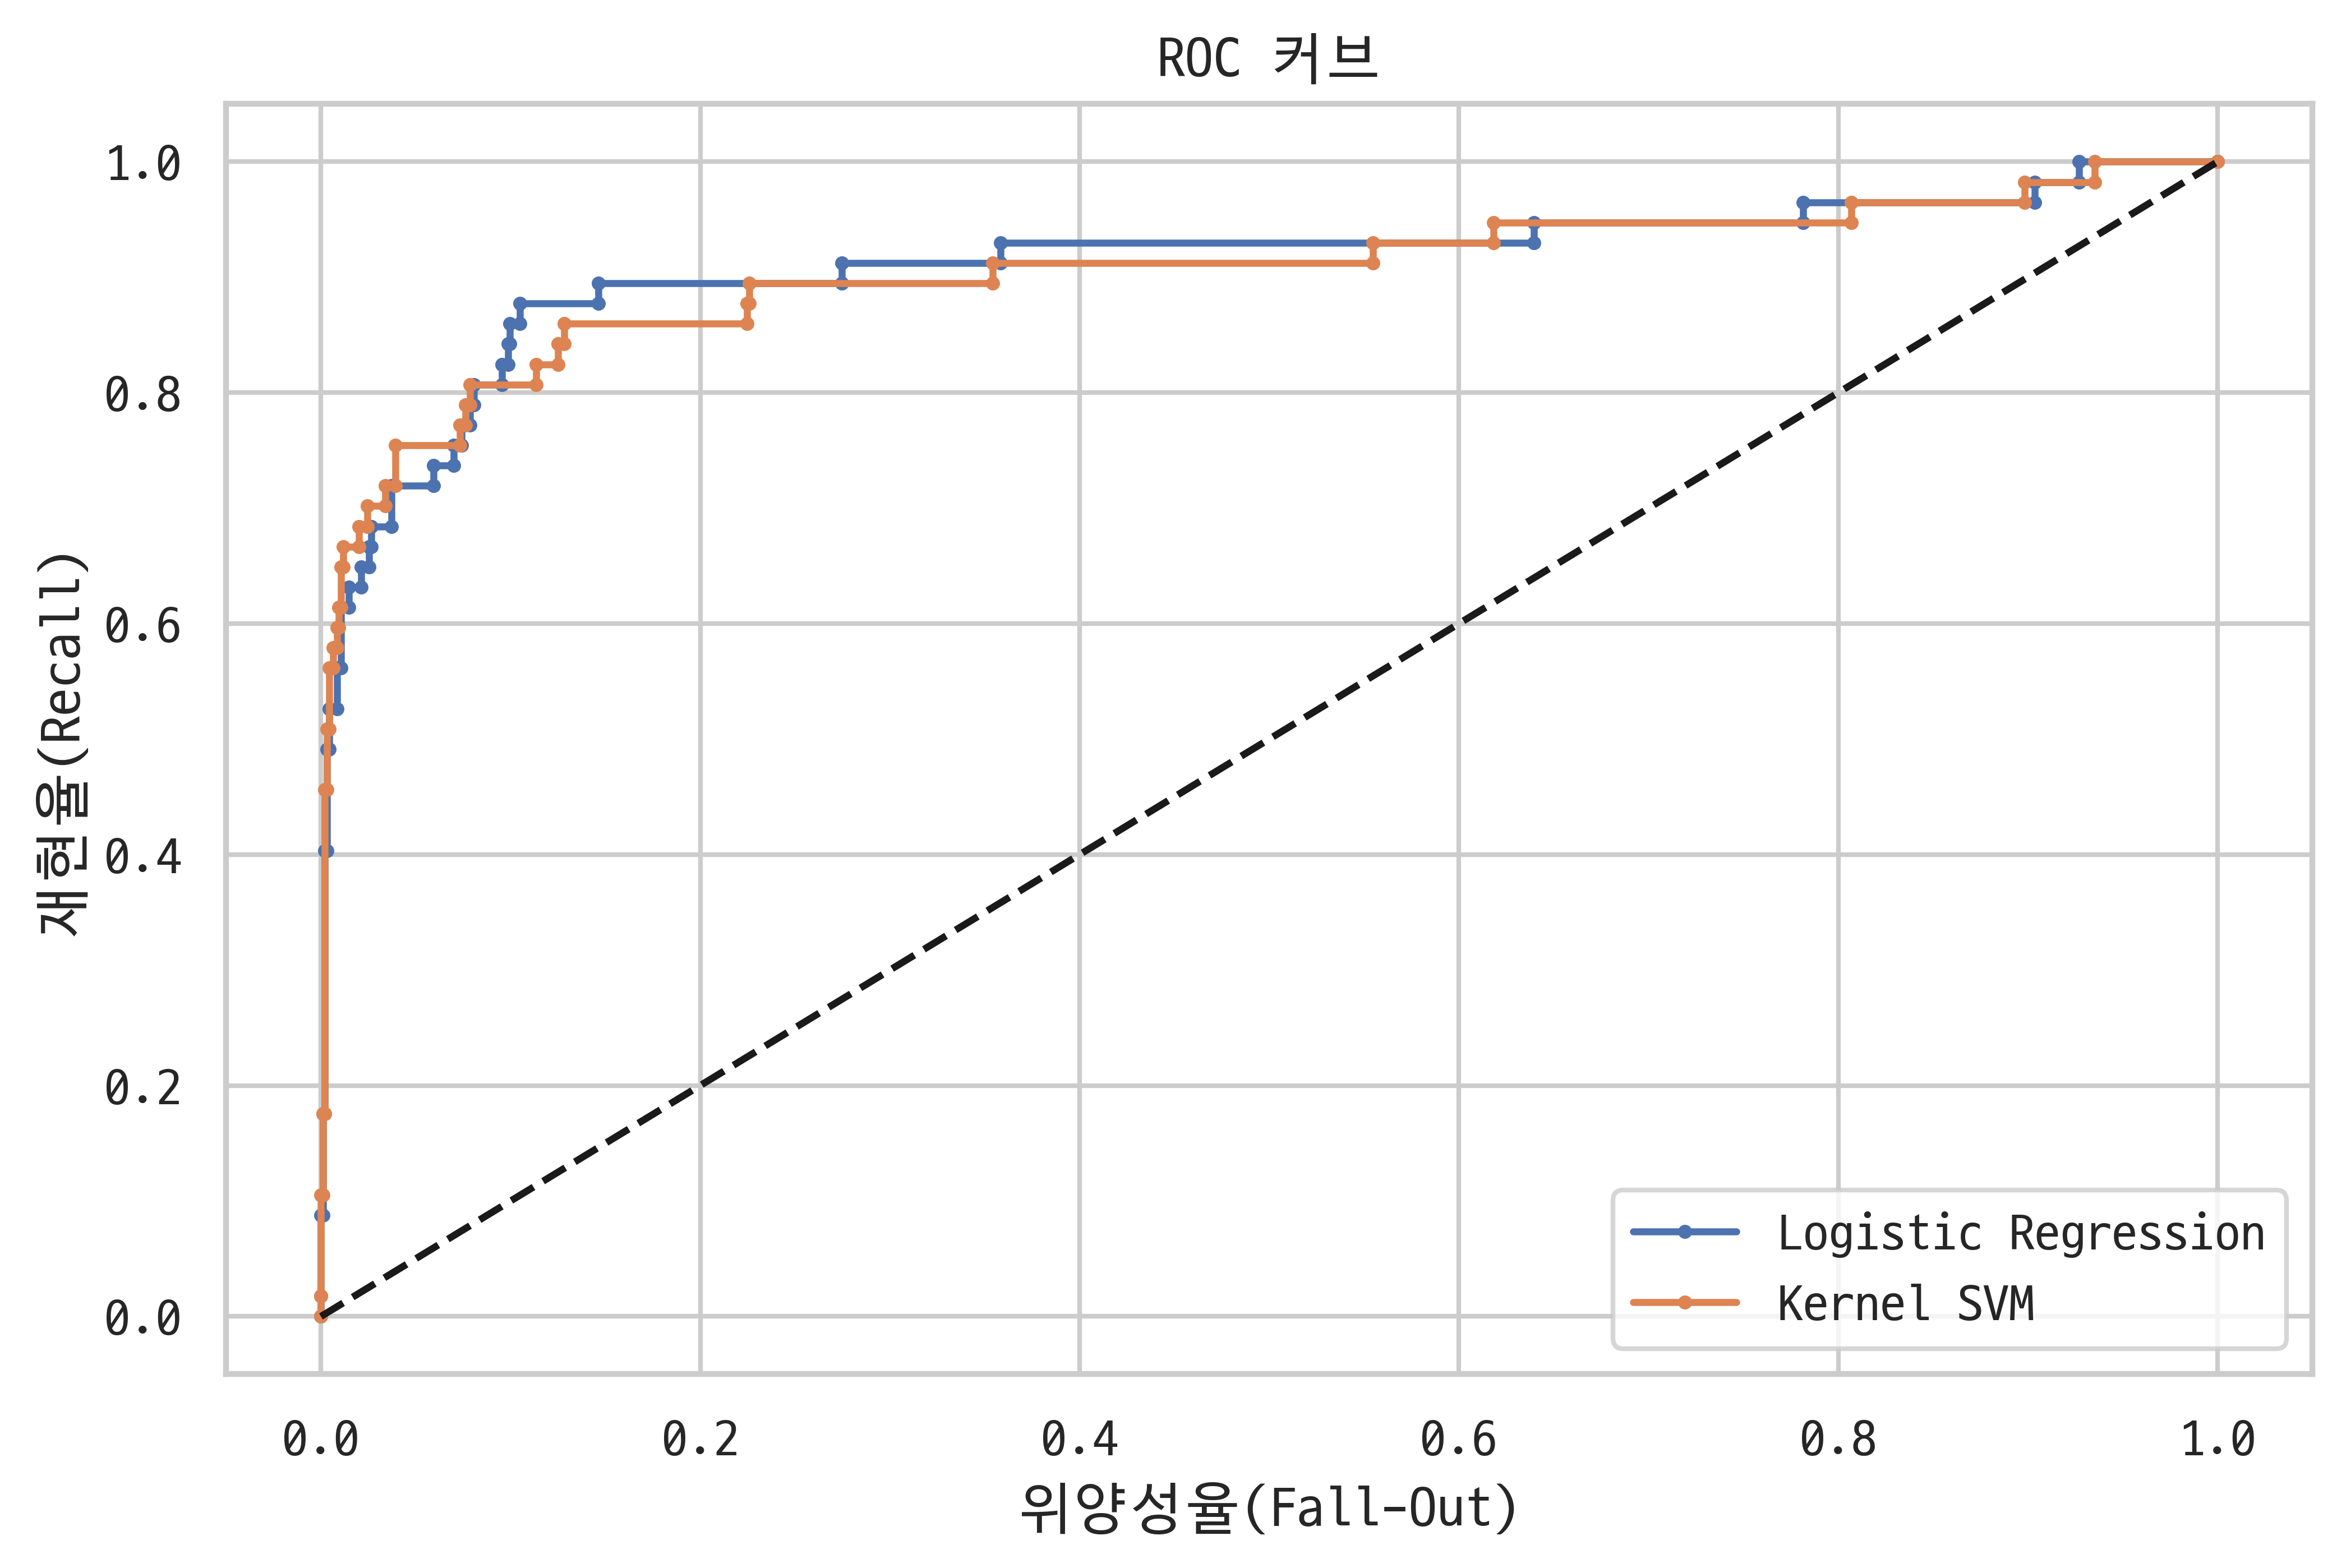

In [23]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label='Logistic Regression')
plt.plot(fpr2, tpr2, 'o-', ms=2, label='Kernel SVM')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('위양성율(Fall-Out)')
plt.ylabel('재현율(Recall)')
plt.title('ROC 커브')
plt.show()

#### AUC

In [24]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

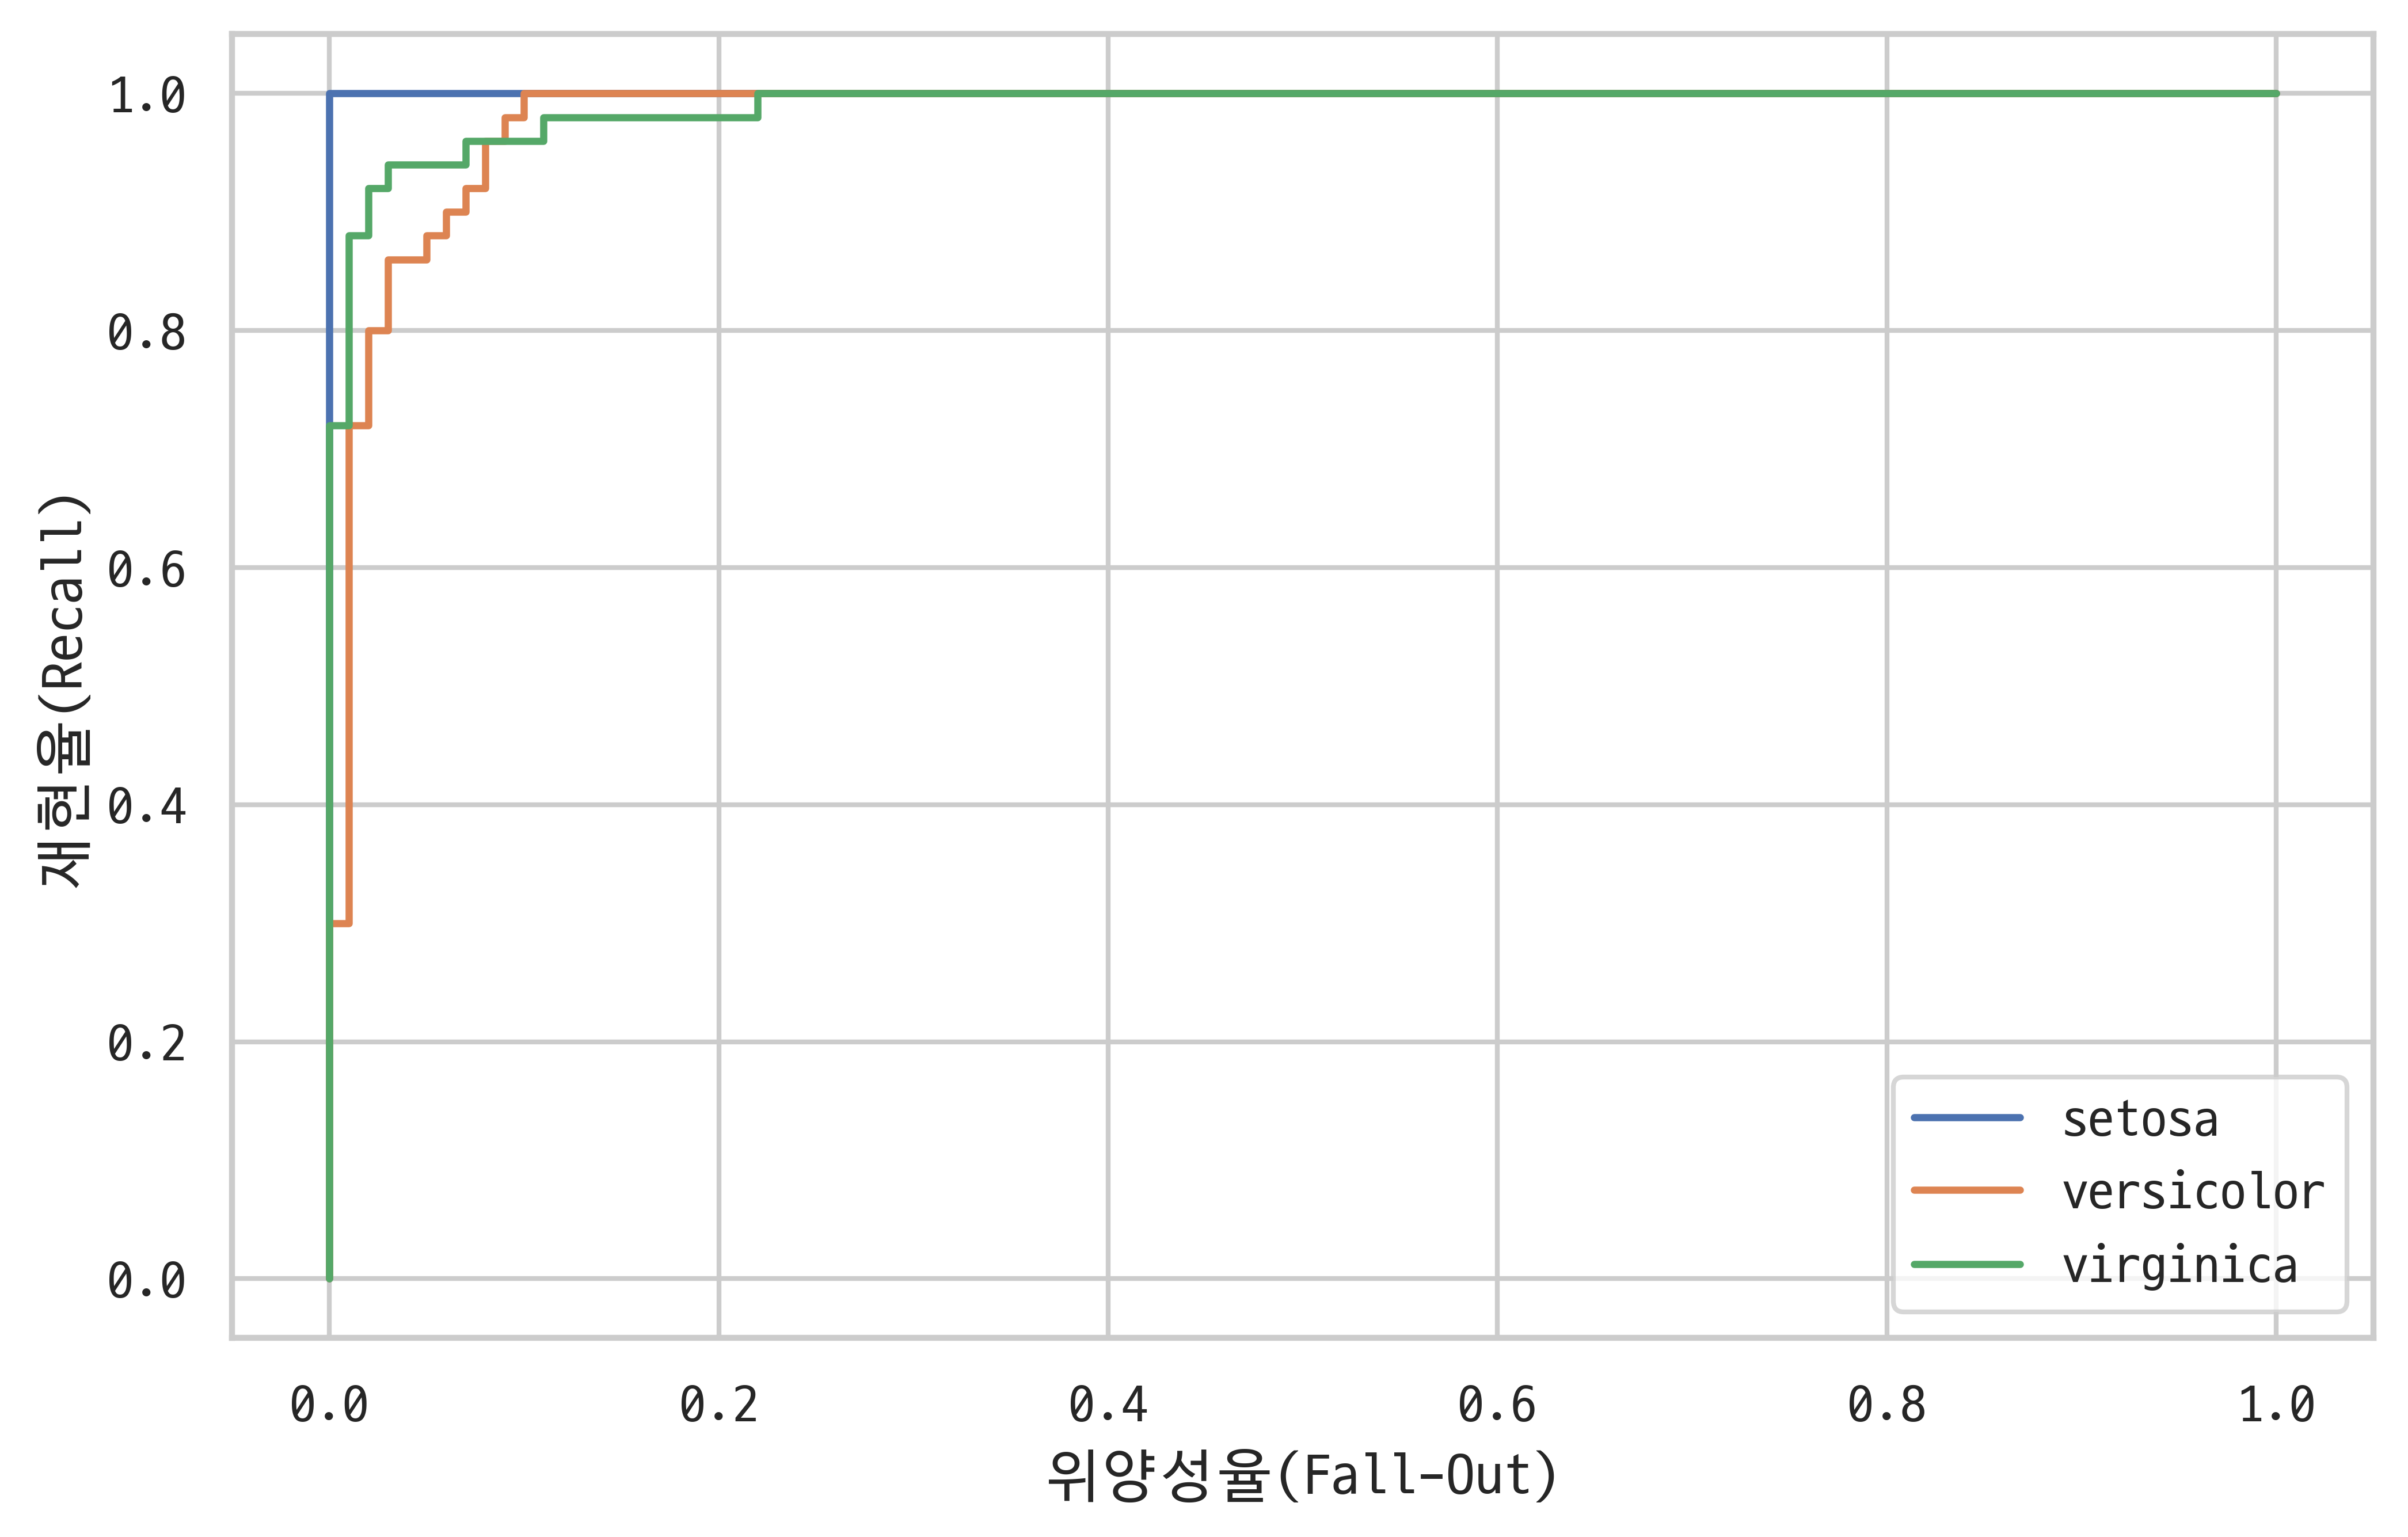

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i], label=iris.target_names[i])

plt.xlabel('위양성율(Fall-Out)')
plt.ylabel('재현율(Recall)')
plt.legend()
plt.show()